In [1]:
import osmnx as ox
import networkx as nx
from tqdm import tqdm
import time
import sys
import random
from IPython.display import IFrame, HTML
from collections import deque
import matplotlib.pyplot as plt
from problem import *
from utils import *

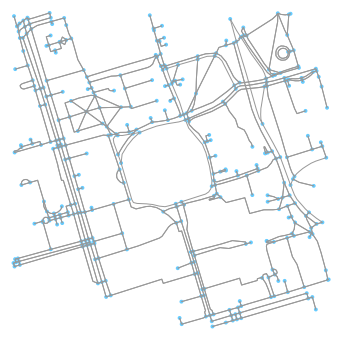

In [2]:
location_point = (43.661667, -79.395)
G = ox.graph_from_point(location_point, dist=300, clean_periphery=True, simplify=True)
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
fig, ax = ox.plot_graph(G)

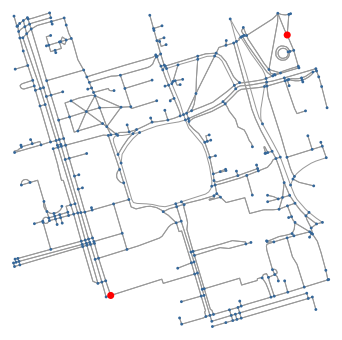

In [3]:
nc = ['r' if node == 389677909 or node == 55808290 else '#336699' for node in G.nodes()]
ns = [50 if node == 389677909 or node == 55808290 else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

In [4]:
%%capture
source(Node)

In [5]:
# first define the origin/source nodes as Node
origin = Node(graph = G, node = G[55808290], osmid = 55808290, distance = 0, parent = None)
destination = Node(graph = G, node = G[389677909], osmid = 389677909)

In [6]:
phermone_concentration = dict()

In [7]:
for u, v in G.edges():
    phermone_concentration[(u,v)] = random.uniform(1,100)

In [8]:
alpha = 0.9
beta = 0.9
Q = 100

In [9]:
sys.setrecursionlimit(10000)

In [12]:
routes = []
for ant in range(1000):
    found = False
    layer = 0
    
    # for each layer/depth of the graph
    layer_nodes = dict()
    visited_nodes = dict()
    
    def traverse_layers(node):
        global layer
        global layer_nodes
        global visited_nodes
        global found
        
        
        stuck.add(node)
        
        if node == destination:
            found = True
            routes.append(child.path())
            return
        
        while True:
            if found:
                return
            
            children = [*node.expand()]
            children_weight = list()
    
            for child in children:
                numerator = phermone_concentration[(node.osmid, child.osmid)] ** alpha * (1/child.distance) ** beta
                denominator = sum([phermone_concentration[(node.osmid, child.osmid)]**alpha * (1/child.distance) ** beta\
                                   for child in children])
                transition_probability = numerator / denominator
                children_weight.append((child, transition_probability))
            
            layer_nodes[layer] = children_weight
            
            choosen, phermone = probabilistic_choice(layer_nodes[layer])
            phermone_concentration[(node, choosen)] += Q / choosen.distance
            layer += 1
            traverse_layers(choosen)
            if layer > 0: layer -= 1
    
    
    print("ant number ",ant, "completed its lap with distance ", cost, " meters")
    traverse_layers(origin)


ant number  0 completed its lap with distance  1129.724347302729  meters
ant number  1 completed its lap with distance  1709.305672418183  meters
ant number  2 completed its lap with distance  1457.721037955285  meters
ant number  3 completed its lap with distance  1522.9039734125577  meters
ant number  4 completed its lap with distance  1682.3232078928077  meters
ant number  5 completed its lap with distance  1326.5829501907722  meters
ant number  6 completed its lap with distance  1567.1979372986502  meters
ant number  7 completed its lap with distance  844.735025400278  meters
ant number  8 completed its lap with distance  1593.992554787258  meters
ant number  9 completed its lap with distance  1802.2599952872408  meters
ant number  10 completed its lap with distance  1751.9833518944197  meters
ant number  11 completed its lap with distance  1316.530759601752  meters
ant number  12 completed its lap with distance  1059.3007462945086  meters
ant number  13 completed its lap with dist

ant number  773 completed its lap with distance  860.2664152806325  meters
ant number  774 completed its lap with distance  932.621424154822  meters
ant number  775 completed its lap with distance  1045.0867290401839  meters
ant number  776 completed its lap with distance  1051.8737196989193  meters
ant number  777 completed its lap with distance  1055.3122707648906  meters
ant number  778 completed its lap with distance  947.2067995506764  meters
ant number  779 completed its lap with distance  1018.8953508346478  meters
ant number  780 completed its lap with distance  1024.0969995683183  meters
ant number  781 completed its lap with distance  878.5050836386894  meters
ant number  782 completed its lap with distance  936.6032075262431  meters
ant number  783 completed its lap with distance  983.3622960757239  meters
ant number  784 completed its lap with distance  902.0361270884246  meters
ant number  785 completed its lap with distance  1007.9615724604342  meters
ant number  786 comp

In [22]:
routes

[([55808290,
   304891685,
   55808284,
   1721866234,
   389678268,
   4953810915,
   389678267,
   24960090,
   24960068,
   1258698109,
   389678145,
   24960070,
   24960073,
   24960076,
   24960080,
   6028561924,
   5098988924,
   389678131,
   6028562356,
   389677908,
   749952029,
   389677909],
  55),
 ([55808290,
   55808177,
   55808169,
   55808239,
   389678268,
   4953810915,
   389678267,
   390547782,
   389678107,
   389678111,
   55808582,
   55808571,
   244213561,
   1258703092,
   244213560,
   389678113,
   24960070,
   24960073,
   24960076,
   24960080,
   6028561924,
   5098988924,
   389678131,
   2557539841,
   389678133,
   389677909],
  41),
 ([55808290,
   304891685,
   55808284,
   1721866234,
   389678268,
   4953810915,
   389678267,
   24960090,
   24960068,
   1258698109,
   389678145,
   24960070,
   24960073,
   24960076,
   24960080,
   6028561924,
   5098988924,
   389678131,
   2557539841,
   389678133,
   389677909],
  67),
 ([55808290,
   304

In [26]:
# the shortest route
route = max(routes, key = lambda pair: pair[1])

In [27]:
route

([55808290,
  55808177,
  55808169,
  55808239,
  389678268,
  4953810915,
  389678267,
  24960090,
  24960068,
  1258698109,
  389678145,
  24960070,
  24960073,
  24960076,
  24960080,
  6028561924,
  5098988924,
  389678131,
  2557539841,
  389678133,
  389677909],
 127)

In [30]:
length_of_route(G, route[0])

862.7959999999999

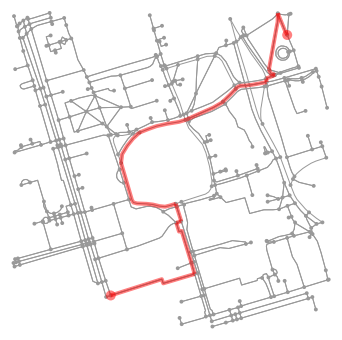

In [32]:
fig, ax = ox.plot_graph_route(G, route[0])